# EDA (Jamal)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

pd.set_option('max_columns', None)

## Loading data

In [2]:
!head -5 ./../data/movies.dat

1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy


In [3]:
df_movies = pd.read_table(
    "./../data/movies.dat", delimiter="::", engine="python",
    names=["MovieID", "Title", "Genres"])
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
!head -5 ./../data/users.dat

1::F::1::10::48067
2::M::56::16::70072
3::M::25::15::55117
4::M::45::7::02460
5::M::25::20::55455


In [5]:
df_users = pd.read_table(
    "./../data/users.dat", delimiter="::", engine="python",
    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
!head -5 ./../data/training.csv

user,movie,rating,timestamp
6040,858,4,956703932
6040,593,5,956703954
6040,2384,4,956703954
6040,1961,4,956703977


In [14]:
df_training = pd.read_csv("./../data/training.csv")
df_training = df_training.drop(columns="timestamp")
df_training.head()

,user,movie,rating
0,6040,858,4
1,6040,593,5
2,6040,2384,4
3,6040,1961,4
4,6040,2019,5


In [8]:
!head -5 ./../data/requests.csv

user,movie
4958,1924
4958,3264
4958,2634
4958,1407


In [9]:
# !head -2 ./../data/movies_metadata.csv

In [10]:
# df_metadata = pd.read_csv("./../data/movies_metadata.csv")
# df_metadata.head()

In [11]:
# !head -2 ./../data/credits.csv

In [12]:
# df_credits = pd.read_csv("./../data/credits.csv")
# df_credits.head()

## movies dataset

In [15]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
df_movies.shape

(3883, 3)

In [16]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [21]:
df_movies['Genres'].nunique()

301

In [ ]:
# s=df.A.str.split('|')
# pd.DataFrame({'A':s.sum(),'B':df.B.repeat(s.str.len())})

In [76]:
s = df_movies["Genres"].str.split("|")
df_movies2 = pd.DataFrame({
    "MovieID": df_movies["MovieID"].repeat(s.str.len()),
    "Title": df_movies["Title"].repeat(s.str.len()),
    "Genres": s.sum()})

In [77]:
df_movies2.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's


In [79]:
df_movies2['Genres'].value_counts()

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
Name: Genres, dtype: int64

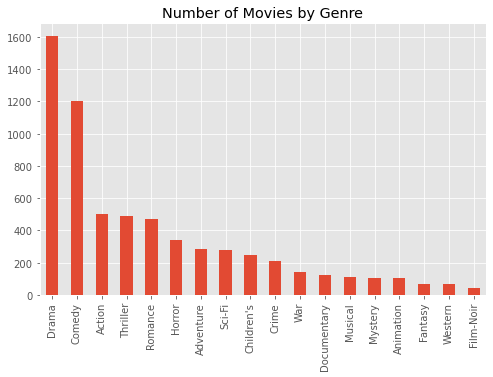

In [82]:
fig, ax = plt.subplots(figsize=(8, 5))
df_movies2['Genres'].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Number of Movies by Genre");

## users dataset

In [22]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [25]:
df_users.shape

(6040, 5)

In [28]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


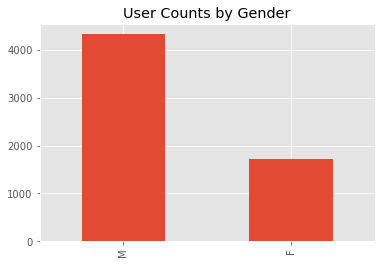

In [33]:
fig, ax = plt.subplots()
df_users["Gender"].value_counts().plot(kind='bar', ax=ax)
ax.set_title("User Counts by Gender");

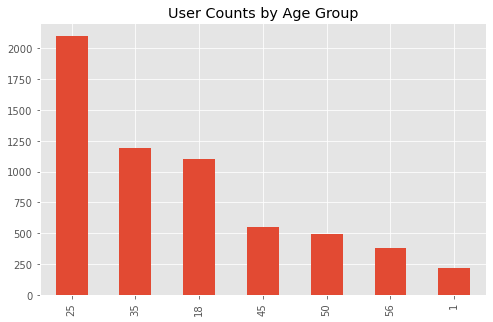

In [88]:
fig, ax = plt.subplots(figsize=(8, 5))
df_users["Age"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("User Counts by Age Group");

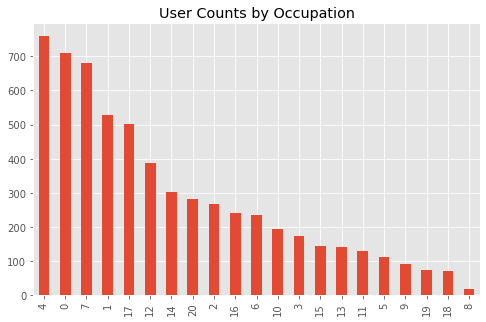

In [86]:
fig, ax = plt.subplots(figsize=(8, 5))
df_users["Occupation"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("User Counts by Occupation");

In [36]:
df_users["Zip-code"].nunique()

3439

## training dataset

In [37]:
df_training.head()

,user,movie,rating
0,6040,858,4
1,6040,593,5
2,6040,2384,4
3,6040,1961,4
4,6040,2019,5


In [85]:
df_training.shape

(800000, 3)

In [38]:
df_training.nunique()

user      5399
movie     3662
rating       5
dtype: int64

In [57]:
df_training["user"].value_counts().describe().round(0)

count    5399.0
mean      148.0
std       171.0
min         2.0
25%        41.0
50%        86.0
75%       187.0
max      1849.0
Name: user, dtype: float64

In [49]:
df_training["user"].value_counts().min()

2

In [50]:
df_training["user"].value_counts().max()

1849

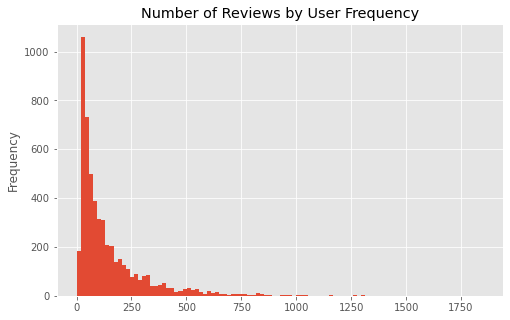

In [87]:
fig, ax = plt.subplots(figsize=(8, 5))
df_training["user"].value_counts().plot(kind='hist', ax=ax, bins=100)
ax.set_title("Number of Reviews by User Frequency");

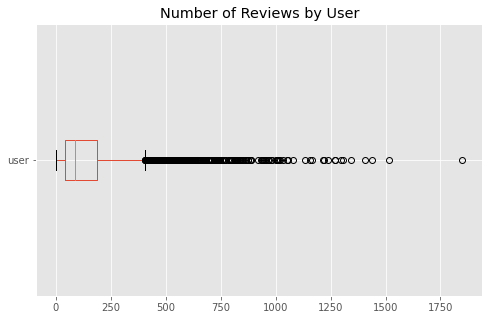

In [61]:
fig, ax = plt.subplots(figsize=(8, 5))
df_training["user"].value_counts().plot(kind='box', ax=ax, vert=False)
ax.set_title("Number of Reviews by User");

In [51]:
df_training["movie"].value_counts()

2858    2901
1196    2516
260     2515
1210    2456
589     2284
        ... 
3651       1
2438       1
3460       1
3337       1
2811       1
Name: movie, Length: 3662, dtype: int64

In [64]:
df_training["movie"].value_counts().describe().round(0)

count    3662.0
mean      218.0
std       317.0
min         1.0
25%        26.0
50%        98.0
75%       278.0
max      2901.0
Name: movie, dtype: float64

In [52]:
df_training["movie"].value_counts().min()

1

In [53]:
df_training["movie"].value_counts().max()

2901

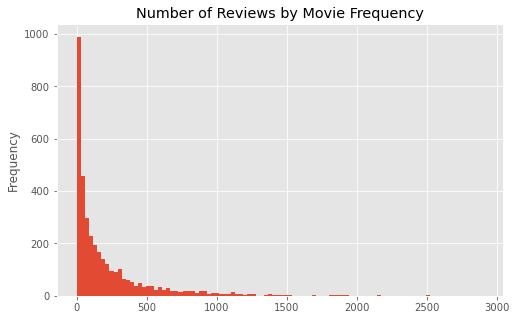

In [89]:
fig, ax = plt.subplots(figsize=(8, 5))
df_training["movie"].value_counts().plot(kind='hist', ax=ax, bins=100)
ax.set_title("Number of Reviews by Movie Frequency");

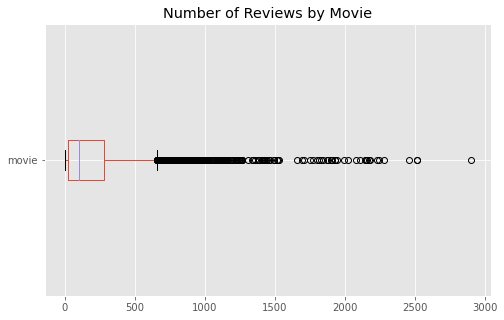

In [62]:
fig, ax = plt.subplots(figsize=(8, 5))
df_training["movie"].value_counts().plot(kind='box', ax=ax, vert=False)
ax.set_title("Number of Reviews by Movie");